<a href="https://colab.research.google.com/github/xhavien/CCADMACL_EXAM_COM222ML/blob/main/Midterm_Exam_Pagdanganan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CCADMACL (Midterm Exam)**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

**Load the Dataset**

In [ ]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")


**Plot the Datasets**

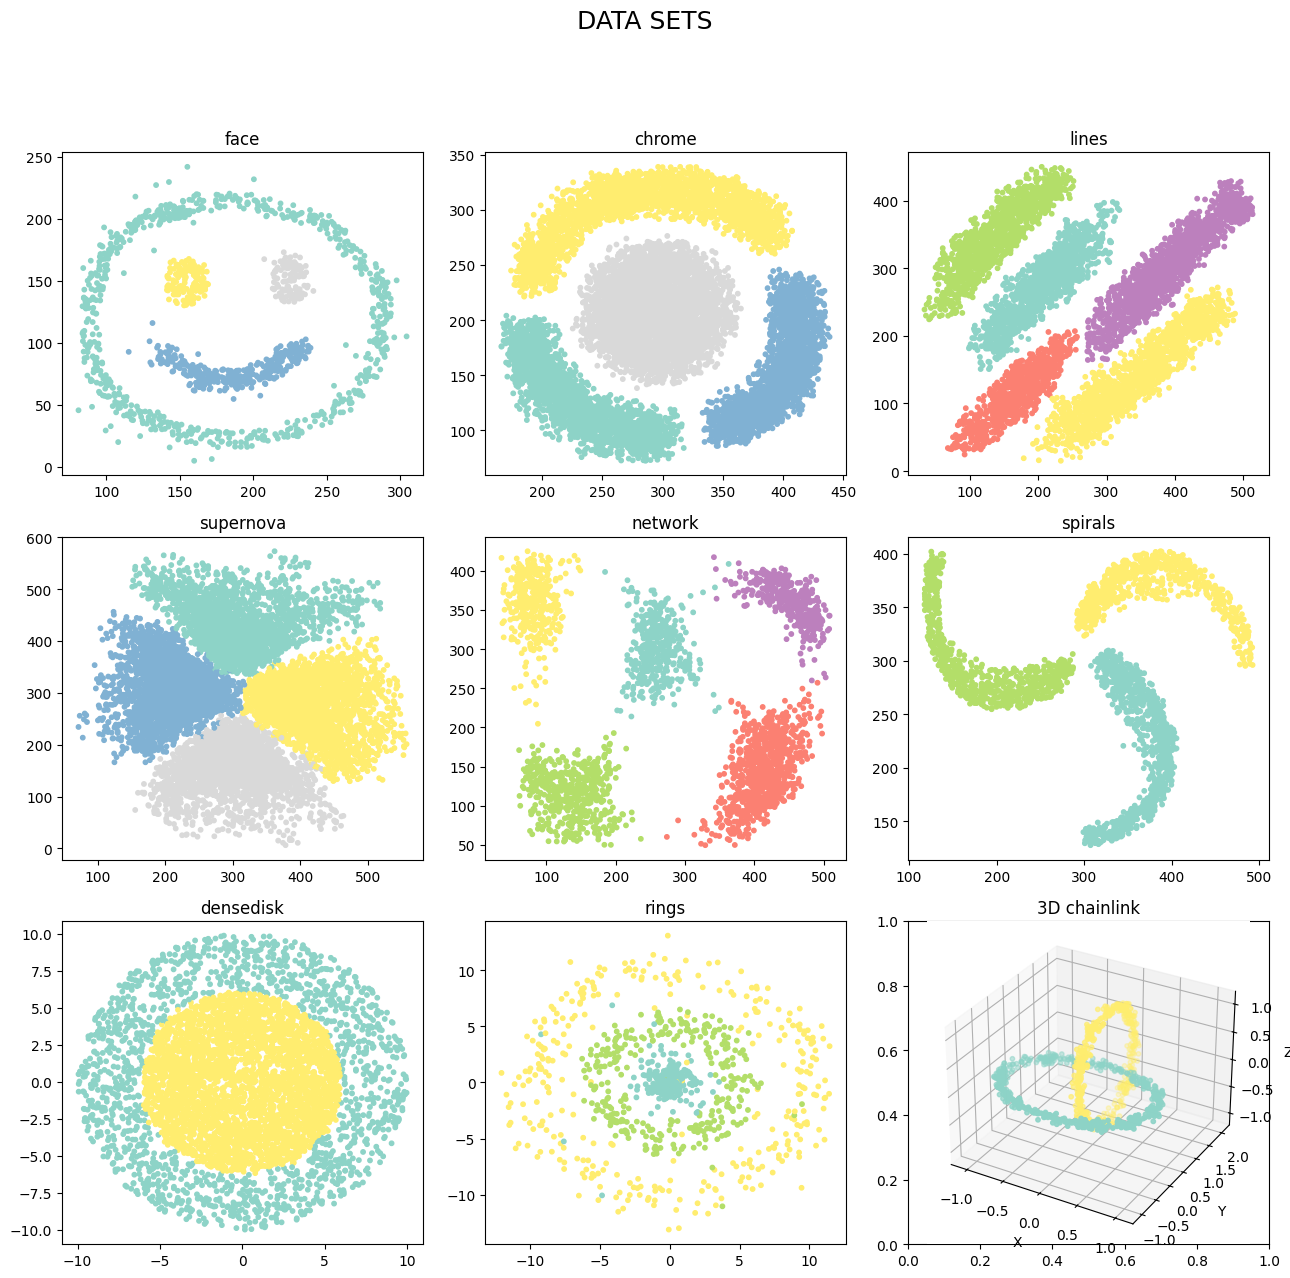

In [452]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])


**A. Use K-means to cluster each dataset**

1. Create each copy of the dataset for k-means

In [453]:

# Copying data sets

df_face_df_kmeans = face_df.copy()
df_chrome_df_kmeans = chrome_df.copy()
df_lines2_df_kmeans = lines2_df.copy()
df_supernova_df_kmeans = supernova_df.copy()
df_network_df_kmeans = network_df.copy()
df_spirals_df_kmeans = spirals_df.copy()
df_densedisk_df_kmeans = densedisk_df.copy()
df_rings_df_kmeans = rings_df.copy()
df_chainlink_kmeans = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [454]:
df_face_df_kmeans.drop(['color'], axis = 1, inplace =True)
df_chrome_df_kmeans.drop(['color'], axis = 1, inplace =True)
df_lines2_df_kmeans.drop(['color'], axis = 1, inplace =True)
df_supernova_df_kmeans.drop(['color'], axis = 1, inplace =True)
df_network_df_kmeans.drop(['color'], axis = 1, inplace =True)
df_spirals_df_kmeans.drop(['color'], axis = 1, inplace =True)
df_densedisk_df_kmeans.drop(['color'], axis = 1, inplace =True)
df_rings_df_kmeans.drop(['color'], axis = 1, inplace =True)
df_chainlink_kmeans.drop(['color'], axis = 1, inplace =True)

3. Train a K-means model for each dataset.

In [455]:
kmeans_face_df = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_chrome_df = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_lines2_df = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_supernova_df = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_network_df = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_spirals_df = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_densedisk_df = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_rings_df = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_chainlink = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

y_kmeans_face_df = kmeans_face_df.fit_predict(df_face_df_kmeans)
y_kmeans_chrome_df = kmeans_chrome_df.fit_predict(df_chrome_df_kmeans)
y_kmeans_lines2_df = kmeans_lines2_df.fit_predict(df_lines2_df_kmeans)
y_kmeans_supernova_df = kmeans_supernova_df.fit_predict(df_supernova_df_kmeans)
y_kmeans_network_df = kmeans_network_df.fit_predict(df_network_df_kmeans)
y_kmeans_spirals_df = kmeans_spirals_df.fit_predict(df_spirals_df_kmeans)
y_kmeans_densedisk_df = kmeans_densedisk_df.fit_predict(df_densedisk_df_kmeans)
y_kmeans_rings_df = kmeans_rings_df.fit_predict(df_rings_df_kmeans)
y_kmeans_chainlink = kmeans_rings_df.fit_predict(df_rings_df_kmeans)

4. Add a "Cluster" column for each data set

In [456]:
df_face_df_kmeans['Cluster'] = y_kmeans_face_df
df_chrome_df_kmeans['Cluster'] = y_kmeans_chrome_df
df_lines2_df_kmeans['Cluster'] = y_kmeans_lines2_df
df_supernova_df_kmeans['Cluster'] = y_kmeans_supernova_df
df_network_df_kmeans['Cluster'] = y_kmeans_network_df
df_spirals_df_kmeans['Cluster'] = y_kmeans_spirals_df
df_densedisk_df_kmeans['Cluster'] = y_kmeans_densedisk_df
df_rings_df_kmeans['Cluster'] = y_kmeans_rings_df
df_chainlink_kmeans['Cluster'] = y_kmeans_chainlink

5.Plot the Correct cluster and the K-means cluster

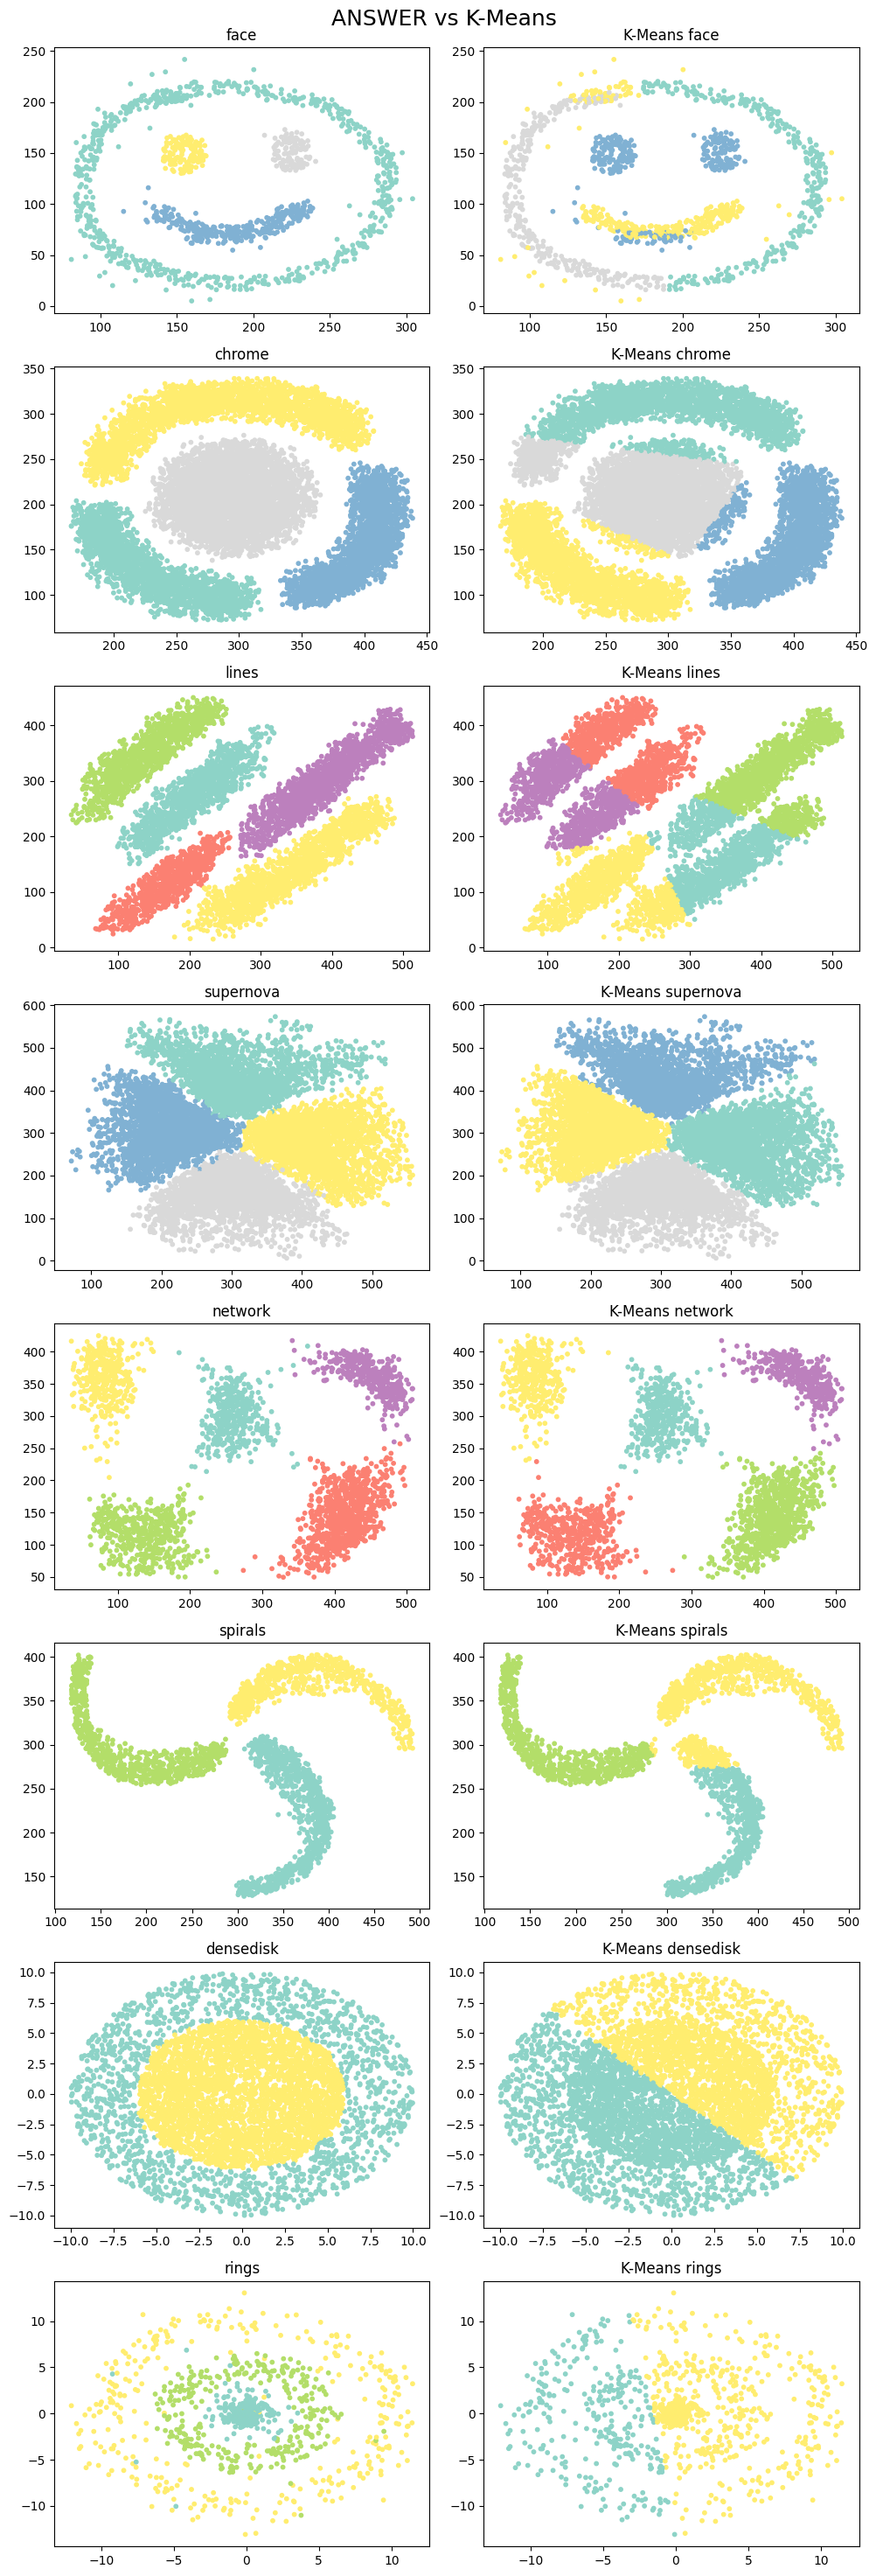

In [457]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Apply KMeans clustering on chainlink_df if not already done
# Assuming 'chainlink_df' has 'x', 'y', and 'z' columns for 3D coordinates

# Example: If there are no cluster columns, we apply KMeans
if 'Cluster' not in chainlink_df.columns:
    kmeans = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters
    chainlink_df['Cluster'] = kmeans.fit_predict(chainlink_df[['x', 'y', 'z']])

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 30))
fig.suptitle('ANSWER vs K-Means\n', size=18)

# 2D plots for each dataset
# Face
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")
axes[0, 1].scatter(df_face_df_kmeans['x'], df_face_df_kmeans['y'], c=df_face_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("K-Means face")

# Chrome
axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome")
axes[1, 1].scatter(df_chrome_df_kmeans['x'], df_chrome_df_kmeans['y'], c=df_chrome_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("K-Means chrome")

# Lines
axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines")
axes[2, 1].scatter(df_lines2_df_kmeans['x'], df_lines2_df_kmeans['y'], c=df_lines2_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("K-Means lines")

# Supernova
axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova")
axes[3, 1].scatter(df_supernova_df_kmeans['x'], df_supernova_df_kmeans['y'], c=df_supernova_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("K-Means supernova")

# Network
axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network")
axes[4, 1].scatter(df_network_df_kmeans['x'], df_network_df_kmeans['y'], c=df_network_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("K-Means network")

# Spirals (corrected index for plotting)
axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals")
axes[5, 1].scatter(df_spirals_df_kmeans['x'], df_spirals_df_kmeans['y'], c=df_spirals_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("K-Means spirals")

# Densedisk (corrected index for plotting)
axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk")
axes[6, 1].scatter(df_densedisk_df_kmeans['x'], df_densedisk_df_kmeans['y'], c=df_densedisk_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("K-Means densedisk")

# Rings (corrected index for plotting)
axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings")
axes[7, 1].scatter(df_rings_df_kmeans['x'], df_rings_df_kmeans['y'], c=df_rings_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("K-Means rings")

plt.tight_layout()
plt.show()


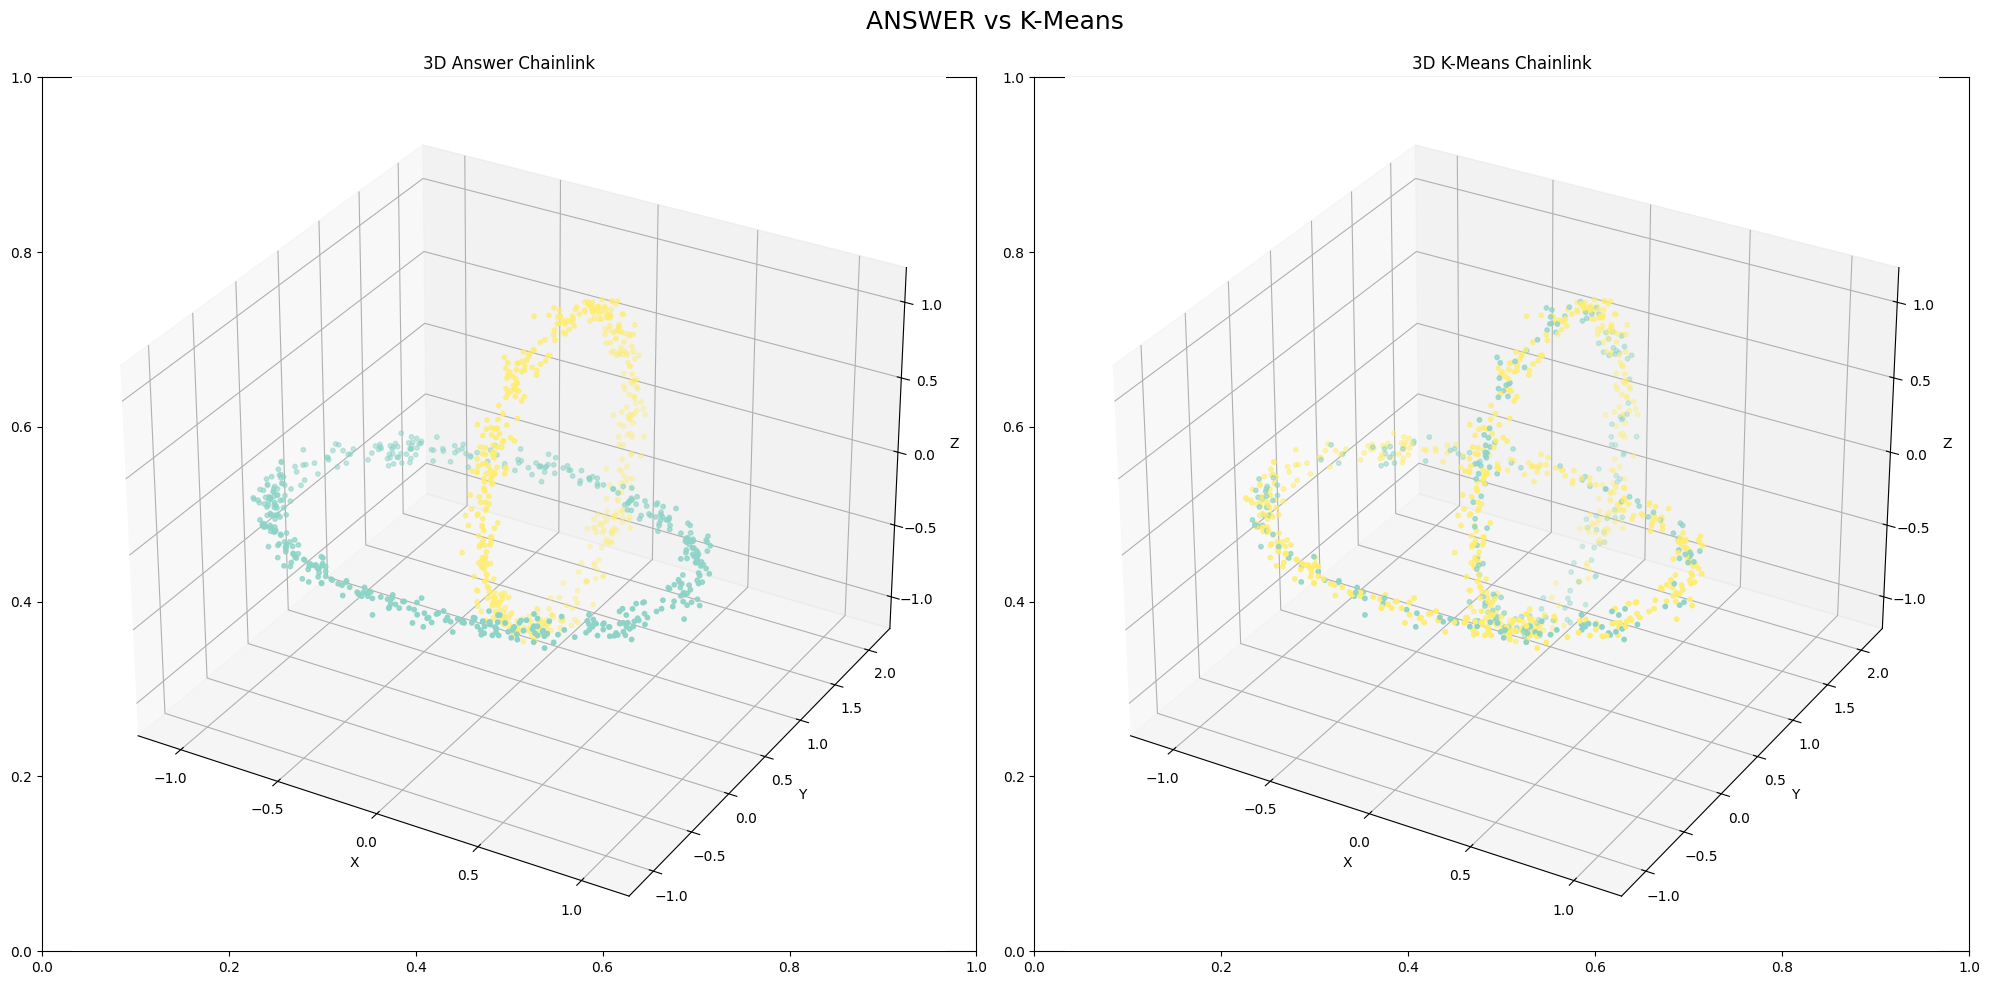

In [458]:
# Create the figure with a 1x2 grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Set the title for the whole figure
fig.suptitle('ANSWER vs K-Means\n', size=18)

# Add a 3D plot for chainlink dataset (Answer) in the first subplot
ax3d = fig.add_subplot(121, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D Answer Chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Add a 3D plot for K-Means chainlink dataset in the second subplot
ax3d_kmeans = fig.add_subplot(122, projection='3d')
ax3d_kmeans.scatter(df_chainlink_kmeans['x'], df_chainlink_kmeans['y'], df_chainlink_kmeans['z'], c=df_chainlink_kmeans['Cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("3D K-Means Chainlink")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()

**B. Use Agglomerative Clustering to cluster each dataset **

1. Create each copy of the dataset for Agglomerative Clustering

In [459]:
# Copying data sets

df_face_df_AgglomerativeC = face_df.copy()
df_chrome_df_AgglomerativeC = chrome_df.copy()
df_lines2_df_AgglomerativeC = lines2_df.copy()
df_supernova_df_AgglomerativeC = supernova_df.copy()
df_network_df_AgglomerativeC = network_df.copy()
df_spirals_df_AgglomerativeC = spirals_df.copy()
df_densedisk_df_AgglomerativeC = densedisk_df.copy()
df_rings_df_AgglomerativeC = rings_df.copy()
df_chainlink_AgglomerativeC = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [460]:
df_face_df_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_chrome_df_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_lines2_df_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_supernova_df_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_network_df_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_spirals_df_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_densedisk_df_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_rings_df_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_chainlink_AgglomerativeC.drop(['color'], axis = 1, inplace =True)

3. Train a Agglomerative Clustering model for each dataset.

In [461]:
AgglomerativeC_face_df = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_chrome_df = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_lines2_df = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
AgglomerativeC_supernova_df = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_spirals_df = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
AgglomerativeC_network_df = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
AgglomerativeC_densedisk_df = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')
AgglomerativeC_rings_df = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
AgglomerativeC_chainlink = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')

y_AgglomerativeC_face_df = AgglomerativeC_face_df.fit_predict(df_face_df_AgglomerativeC)
y_AgglomerativeC_chrome_df = AgglomerativeC_chrome_df.fit_predict(df_chrome_df_AgglomerativeC)
y_AgglomerativeC_lines2_df = AgglomerativeC_lines2_df.fit_predict(df_lines2_df_AgglomerativeC)
y_AgglomerativeC_supernova_df = AgglomerativeC_supernova_df.fit_predict(df_supernova_df_AgglomerativeC)
y_AgglomerativeC_spirals_df = AgglomerativeC_spirals_df.fit_predict(df_spirals_df_AgglomerativeC)
y_AgglomerativeC_network_df = AgglomerativeC_network_df.fit_predict(df_network_df_AgglomerativeC)
y_AgglomerativeC_densedisk_df = AgglomerativeC_densedisk_df.fit_predict(df_densedisk_df_AgglomerativeC)
y_AgglomerativeC_rings_df = AgglomerativeC_rings_df.fit_predict(df_rings_df_AgglomerativeC)
y_AgglomerativeC_chainlink = AgglomerativeC_chainlink.fit_predict(df_chainlink_AgglomerativeC)

4. Add a "Cluster" column for each data set

In [462]:
# Creating 'Cluster' columns in data sets
df_face_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_face_df
df_chrome_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_chrome_df
df_lines2_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_lines2_df
df_supernova_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_supernova_df
df_spirals_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_spirals_df
df_network_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_network_df
df_densedisk_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_densedisk_df
df_rings_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_rings_df
df_chainlink_AgglomerativeC['Cluster'] = y_AgglomerativeC_chainlink

5. Plot the Correct cluster and the Agglomerative cluster

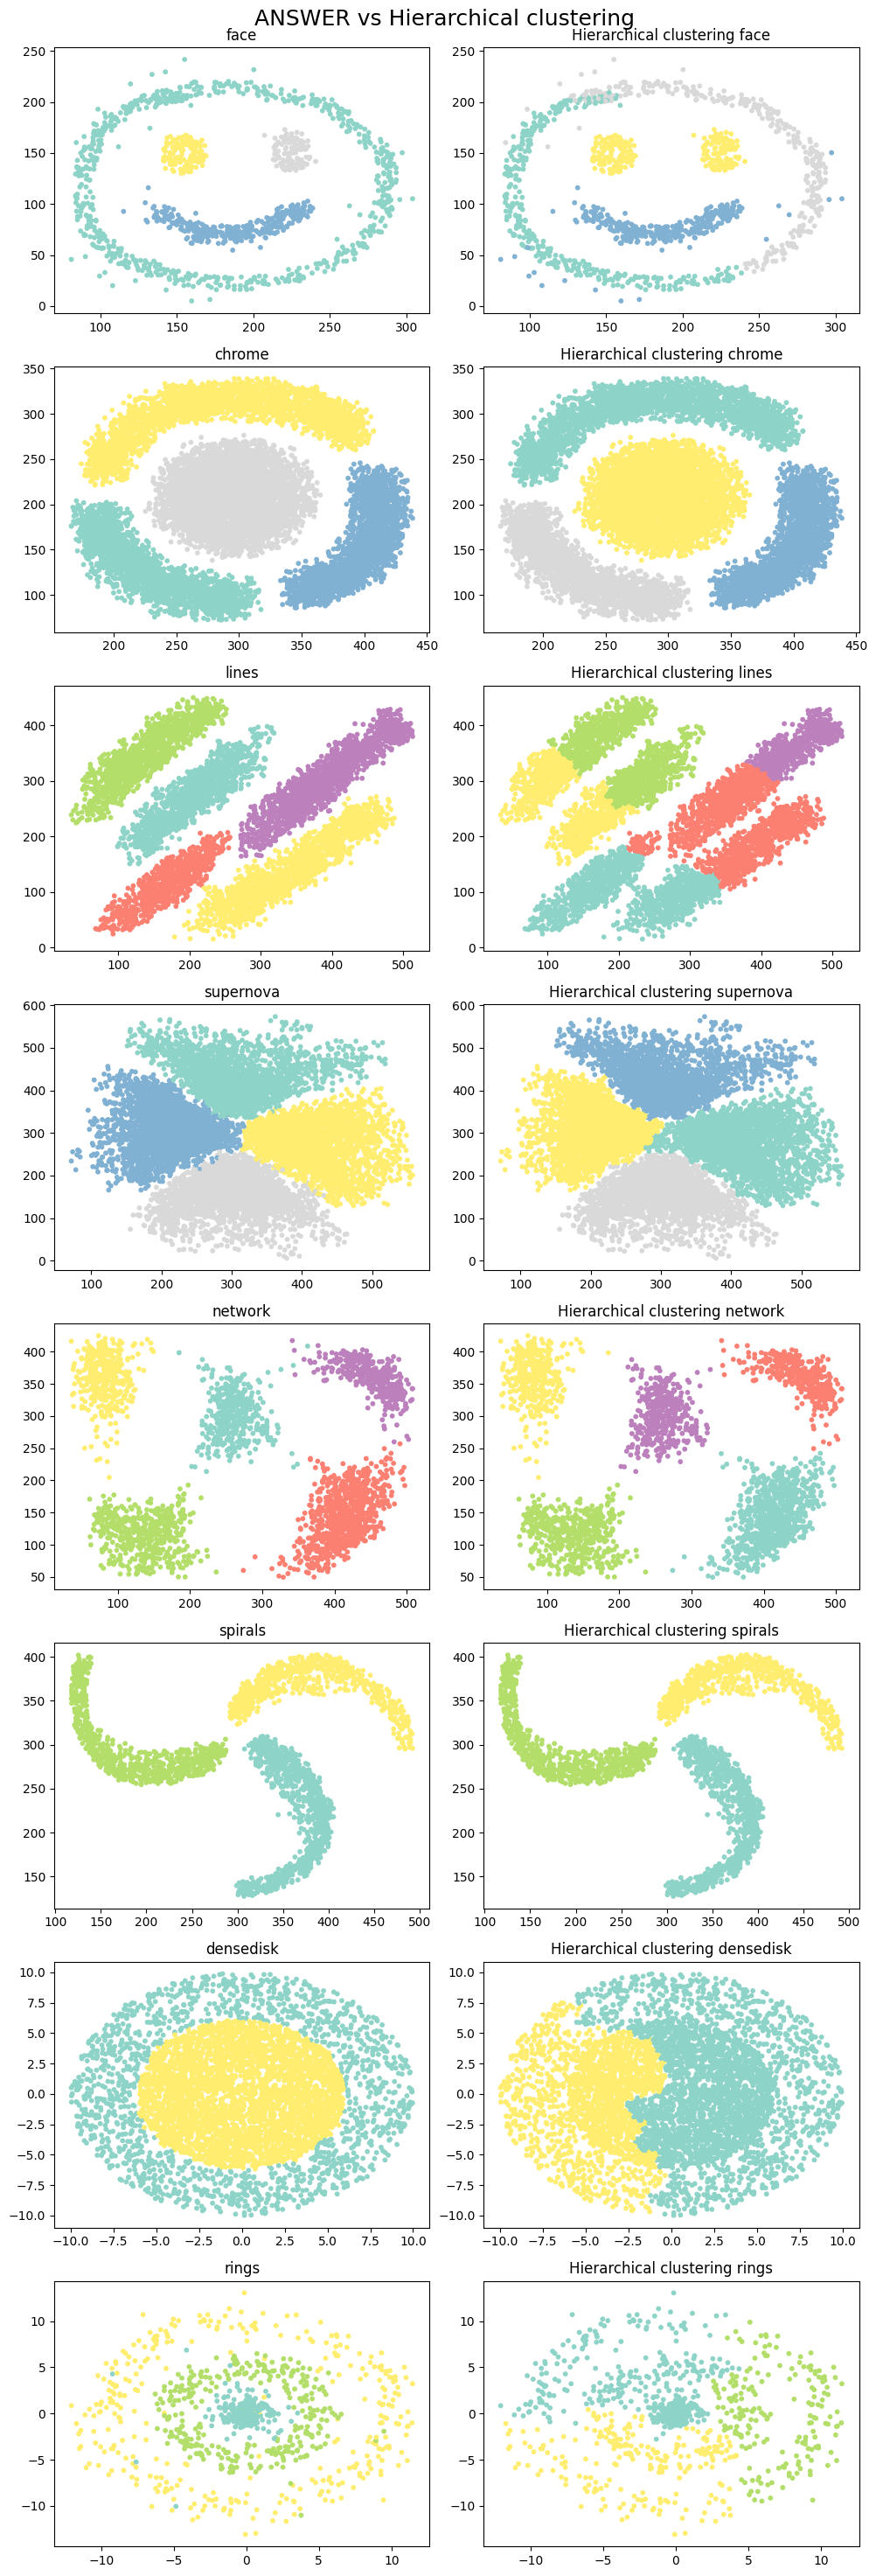

In [463]:
import matplotlib.pyplot as plt

# Create the figure with 8 rows and 2 columns
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 30))
fig.suptitle('ANSWER vs Hierarchical clustering\n', size=18)

# Plot for "face" dataset
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")
axes[0, 1].scatter(df_face_df_AgglomerativeC['x'], df_face_df_AgglomerativeC['y'], c=df_face_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("Hierarchical clustering face")

# Plot for "chrome" dataset
axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome")
axes[1, 1].scatter(df_chrome_df_AgglomerativeC['x'], df_chrome_df_AgglomerativeC['y'], c=df_chrome_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("Hierarchical clustering chrome")

# Plot for "lines" dataset
axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines")
axes[2, 1].scatter(df_lines2_df_AgglomerativeC['x'], df_lines2_df_AgglomerativeC['y'], c=df_lines2_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("Hierarchical clustering lines")

# Plot for "supernova" dataset
axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova")
axes[3, 1].scatter(df_supernova_df_AgglomerativeC['x'], df_supernova_df_AgglomerativeC['y'], c=df_supernova_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("Hierarchical clustering supernova")

# Plot for "network" dataset
axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network")
axes[4, 1].scatter(df_network_df_AgglomerativeC['x'], df_network_df_AgglomerativeC['y'], c=df_network_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("Hierarchical clustering network")

# Plot for "spirals" dataset
axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals")
axes[5, 1].scatter(df_spirals_df_AgglomerativeC['x'], df_spirals_df_AgglomerativeC['y'], c=df_spirals_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("Hierarchical clustering spirals")

# Plot for "densedisk" dataset
axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk")
axes[6, 1].scatter(df_densedisk_df_AgglomerativeC['x'], df_densedisk_df_AgglomerativeC['y'], c=df_densedisk_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("Hierarchical clustering densedisk")

# Plot for "rings" dataset
axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings")
axes[7, 1].scatter(df_rings_df_AgglomerativeC['x'], df_rings_df_AgglomerativeC['y'], c=df_rings_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("Hierarchical clustering rings")

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()


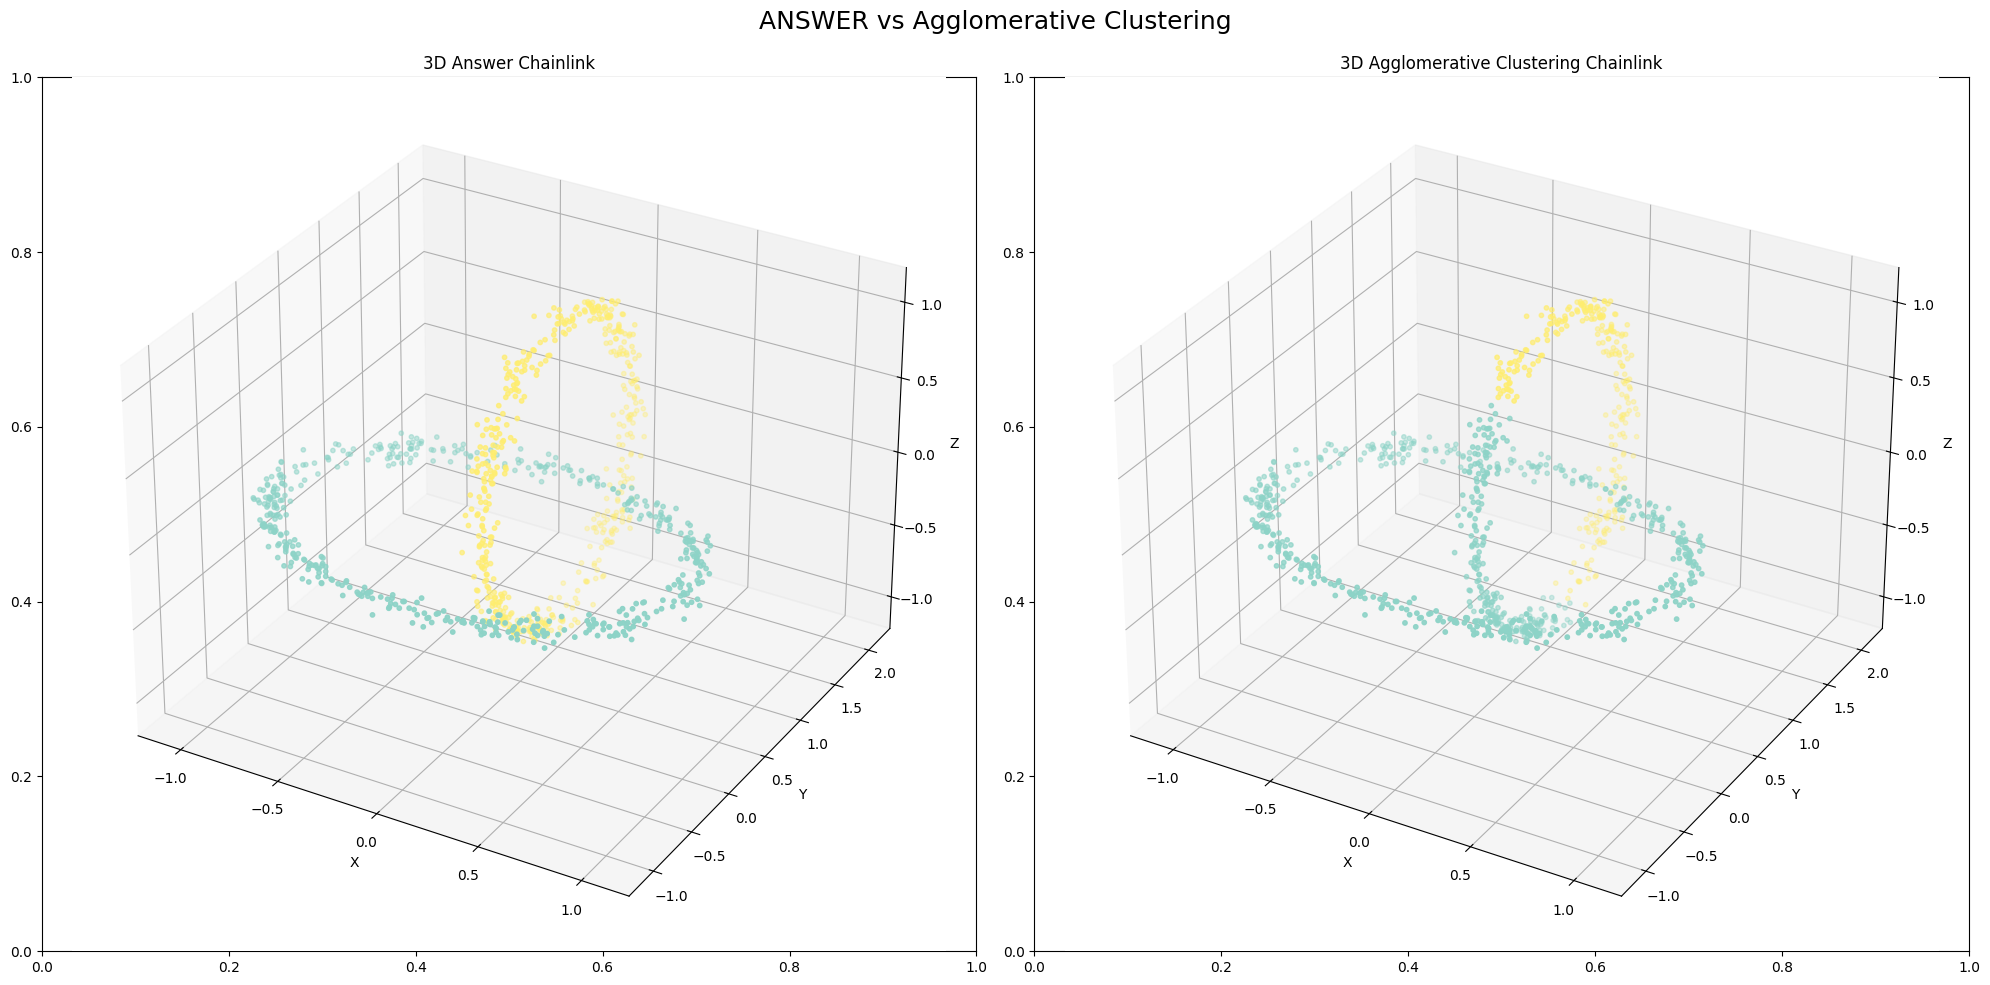

In [464]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

# Assuming `chainlink_df` is already available and contains 'x', 'y', 'z', 'color'

# Apply Agglomerative Clustering (2 clusters for example)
agg_clustering = AgglomerativeClustering(n_clusters=2)
chainlink_df['AgglomerativeCluster'] = agg_clustering.fit_predict(chainlink_df[['x', 'y', 'z']])

# Create the figure with a 1x2 grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Set the title for the whole figure
fig.suptitle('ANSWER vs Agglomerative Clustering\n', size=18)

# Add a 3D plot for chainlink dataset (Answer) in the first subplot
ax3d = fig.add_subplot(121, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D Answer Chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Add a 3D plot for Agglomerative Clustering (chainlink dataset) in the second subplot
ax3d_agg = fig.add_subplot(122, projection='3d')
ax3d_agg.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['AgglomerativeCluster'], cmap="Set3", s=10)
ax3d_agg.set_title("3D Agglomerative Clustering Chainlink")
ax3d_agg.set_xlabel("X")
ax3d_agg.set_ylabel("Y")
ax3d_agg.set_zlabel("Z")

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()



**C. Use DBSCAN to cluster each dataset**

1. Create each copy of the dataset for DBSCAN Clustering

In [465]:
df_face_df_DBScan = face_df.copy()
df_chrome_df_DBScan = chrome_df.copy()
df_lines2_df_DBScan = lines2_df.copy()
df_supernova_df_DBScan = supernova_df.copy()
df_network_df_DBScan = network_df.copy()
df_spirals_df_DBScan = spirals_df.copy()
df_densedisk_df_DBScan = densedisk_df.copy()
df_rings_df_DBScan = rings_df.copy()
df_chainlink_DBScan = chainlink_df.copy()

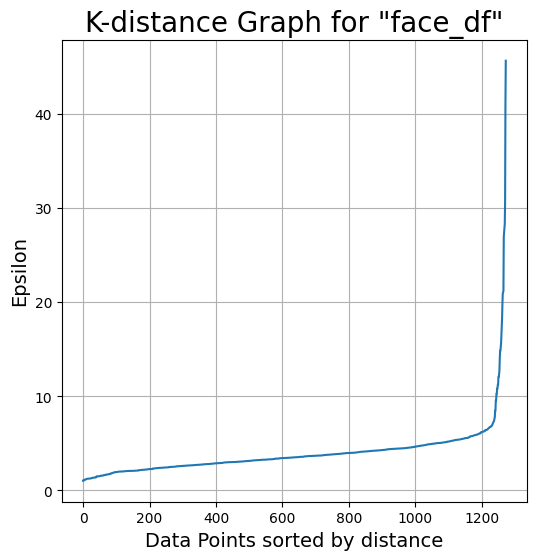

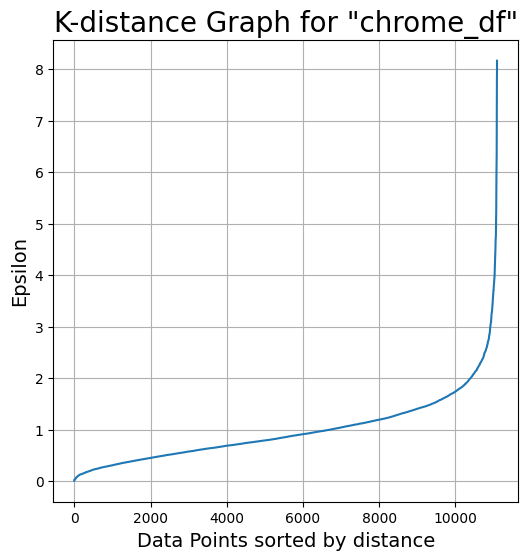

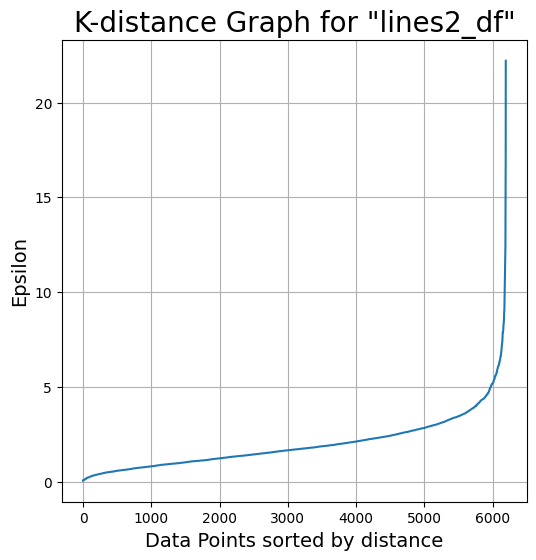

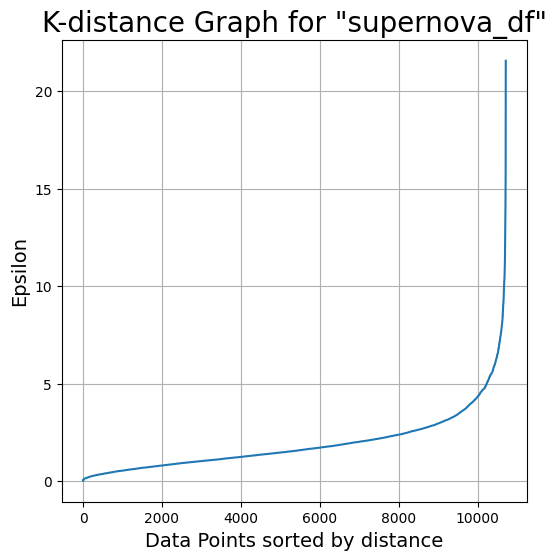

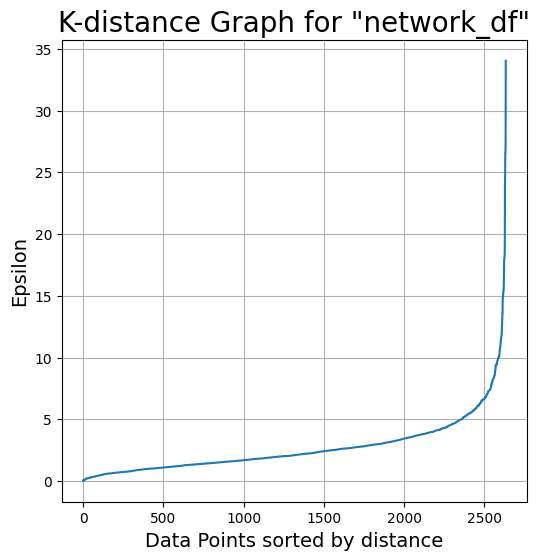

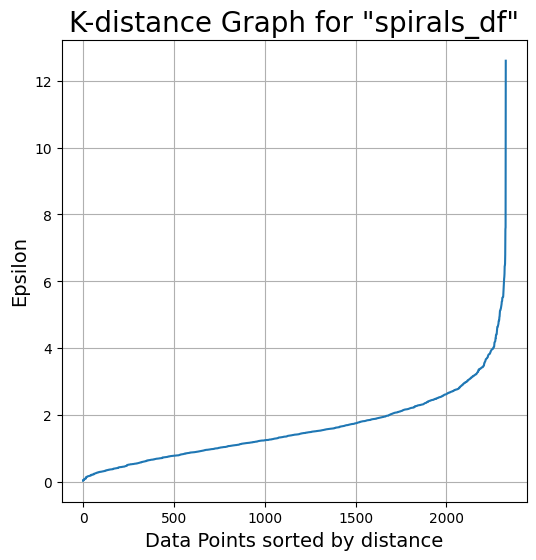

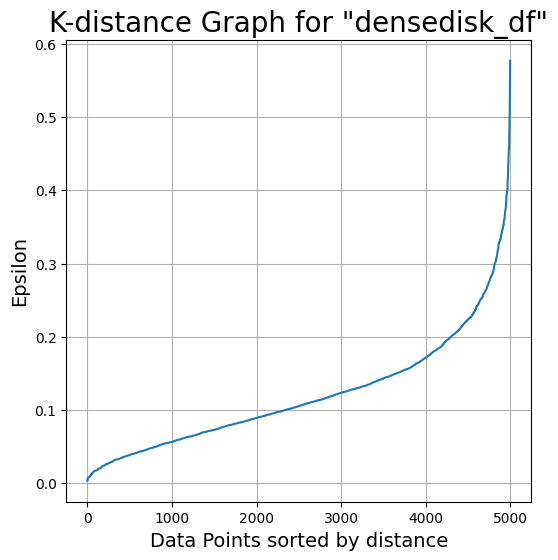

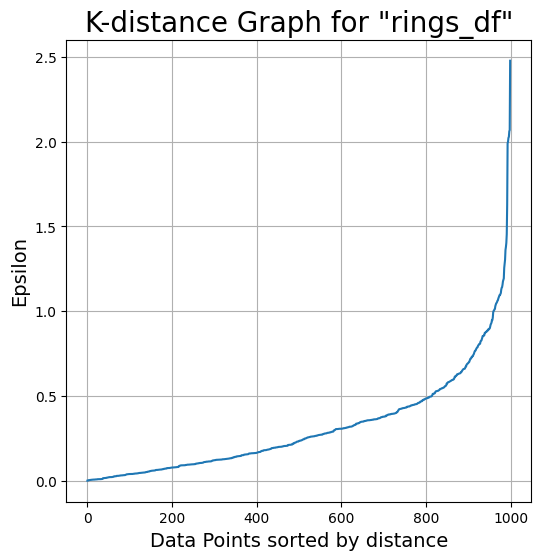

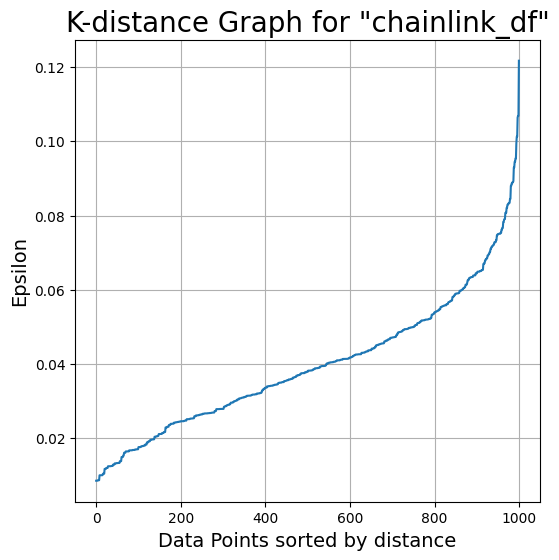

In [466]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

# List of datasets
datasets = {
    "face_df": df_face_df_DBScan,
    "chrome_df": df_chrome_df_DBScan,
    "lines2_df": df_lines2_df_DBScan,
    "supernova_df": df_supernova_df_DBScan,
    "network_df": df_network_df_DBScan,
    "spirals_df": df_spirals_df_DBScan,
    "densedisk_df": df_densedisk_df_DBScan,
    "rings_df": df_rings_df_DBScan,
    "chainlink_df": df_chainlink_DBScan
}

# Parameters
n_neighbors = 4

# Generate and plot K-distance graph for each dataset
for name, df in datasets.items():
    nn = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = nn.fit(df)
    distances, indices = nbrs.kneighbors(df)

    # Sort distances and extract the second column (k-th neighbor distance)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]

    # Plot K-distance graph
    plt.figure(figsize=(6, 6))
    plt.plot(distances)
    plt.title(f'K-distance Graph for "{name}"', fontsize=20)
    plt.xlabel('Data Points sorted by distance', fontsize=14)
    plt.ylabel('Epsilon', fontsize=14)
    plt.grid(True)
    plt.show()


2. Drop the "color" column on all datasets

In [467]:
# List of dataset names and corresponding DataFrames
datasets = {
    "df_face_df_DBScan": face_df.copy(),
    "df_chrome_df_DBScan": chrome_df.copy(),
    "df_lines2_df_DBScan": lines2_df.copy(),
    "df_supernova_df_DBScan": supernova_df.copy(),
    "df_network_df_DBScan": network_df.copy(),
    "df_spirals_df_DBScan": spirals_df.copy(),
    "df_densedisk_df_DBScan": densedisk_df.copy(),
    "df_rings_df_DBScan": rings_df.copy(),
    "df_chainlink_DBScan": chainlink_df.copy()
}

# Drop the 'color' column from each dataset
for name, df in datasets.items():
    df.drop(['color'], axis=1, inplace=True)
    globals()[name] = df  # Update the variable in the global namespace


3. Train a DBSCAN Clustering model for each dataset.

In [468]:
from sklearn.cluster import DBSCAN

# Dictionary of datasets
datasets = {
    "df_face_df_DBScan": df_face_df_DBScan,
    "df_chrome_df_DBScan": df_chrome_df_DBScan,
    "df_lines2_df_DBScan": df_lines2_df_DBScan,
    "df_supernova_df_DBScan": df_supernova_df_DBScan,
    "df_network_df_DBScan": df_network_df_DBScan,
    "df_spirals_df_DBScan": df_spirals_df_DBScan,
    "df_densedisk_df_DBScan": df_densedisk_df_DBScan,
    "df_rings_df_DBScan": df_rings_df_DBScan,
    "df_chainlink_DBScan": df_chainlink_DBScan
}

# Custom DBSCAN parameters for each dataset
params = {
    "df_face_df_DBScan": {"eps": 17.5, "min_samples": 3},
    "df_chrome_df_DBScan": {"eps": 8, "min_samples": 4},
    "df_lines2_df_DBScan": {"eps": 10, "min_samples": 6},
    "df_supernova_df_DBScan": {"eps": 12, "min_samples": 6},
    "df_network_df_DBScan": {"eps": 20, "min_samples": 4},
    "df_spirals_df_DBScan": {"eps": 8, "min_samples": 6},
    "df_densedisk_df_DBScan": {"eps": 1, "min_samples": 45},
    "df_rings_df_DBScan": {"eps": 5, "min_samples": 4},
    "df_chainlink_DBScan": {"eps": 0.1, "min_samples": 5}
}

# Train DBSCAN for each dataset
y_DBScan_results = {}

for name, df in datasets.items():
    eps = params[name]["eps"]
    min_samples = params[name]["min_samples"]

    # Train DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    y_DBScan_results[name] = dbscan.fit_predict(df)

    print(f"DBSCAN clustering for {name} completed.")


DBSCAN clustering for df_face_df_DBScan completed.
DBSCAN clustering for df_chrome_df_DBScan completed.
DBSCAN clustering for df_lines2_df_DBScan completed.
DBSCAN clustering for df_supernova_df_DBScan completed.
DBSCAN clustering for df_network_df_DBScan completed.
DBSCAN clustering for df_spirals_df_DBScan completed.
DBSCAN clustering for df_densedisk_df_DBScan completed.
DBSCAN clustering for df_rings_df_DBScan completed.
DBSCAN clustering for df_chainlink_DBScan completed.


4. Add a "Cluster" column for each data set

In [469]:
# Add the 'Cluster' column to each dataset
df_face_df_DBScan['Cluster'] = y_DBScan_results['df_face_df_DBScan']
df_chrome_df_DBScan['Cluster'] = y_DBScan_results['df_chrome_df_DBScan']
df_lines2_df_DBScan['Cluster'] = y_DBScan_results['df_lines2_df_DBScan']
df_supernova_df_DBScan['Cluster'] = y_DBScan_results['df_supernova_df_DBScan']
df_network_df_DBScan['Cluster'] = y_DBScan_results['df_network_df_DBScan']
df_spirals_df_DBScan['Cluster'] = y_DBScan_results['df_spirals_df_DBScan']
df_densedisk_df_DBScan['Cluster'] = y_DBScan_results['df_densedisk_df_DBScan']
df_rings_df_DBScan['Cluster'] = y_DBScan_results['df_rings_df_DBScan']
df_chainlink_DBScan['Cluster'] = y_DBScan_results['df_chainlink_DBScan']


5. Plot the Correct cluster and the DBSCAN cluster

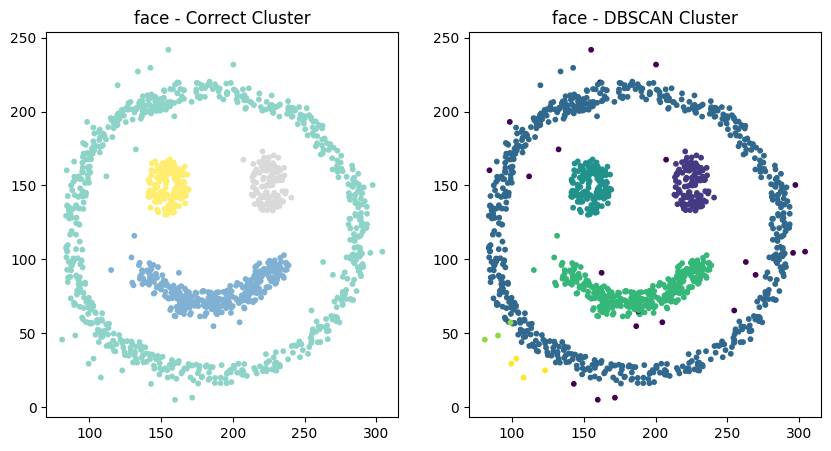

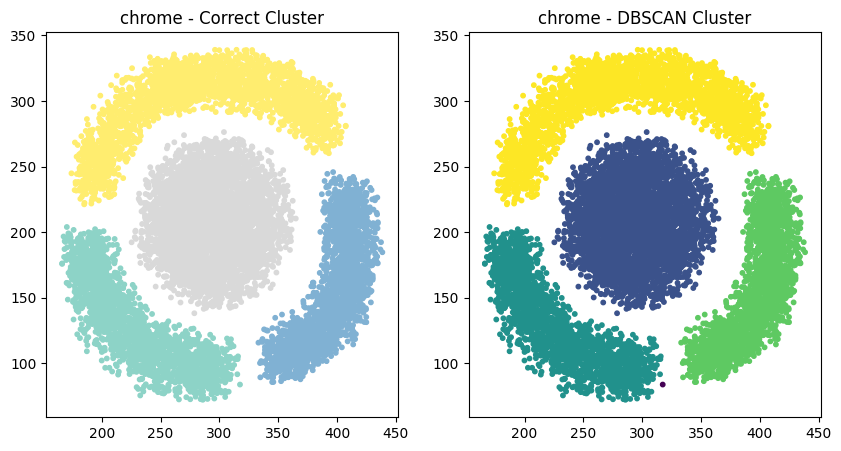

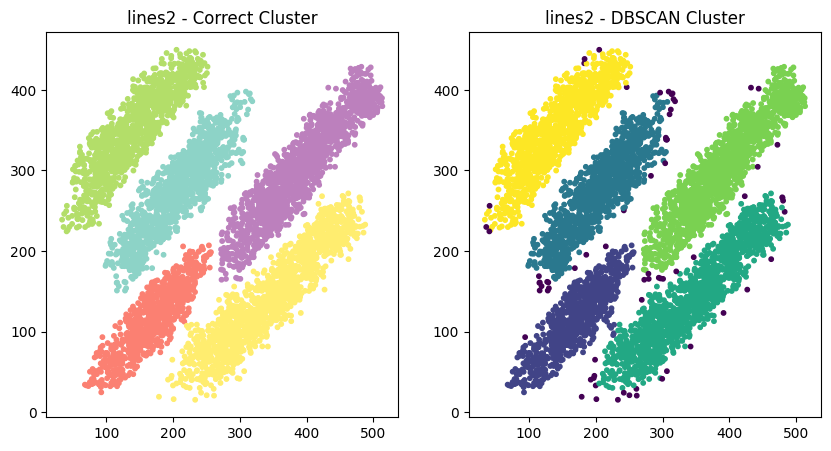

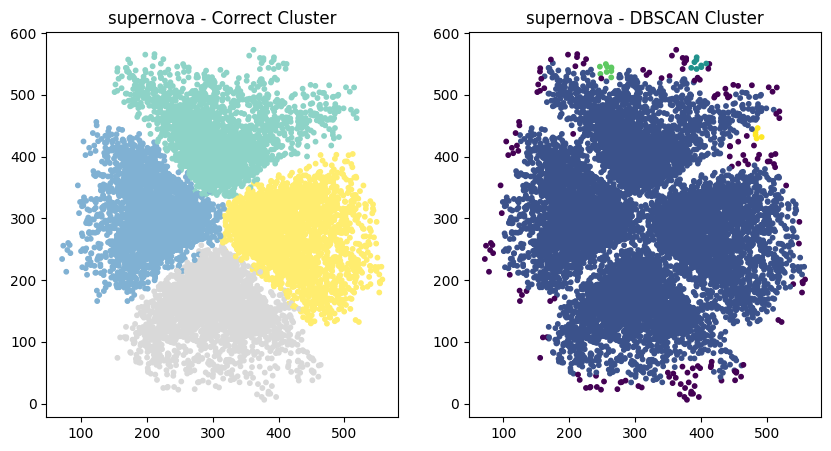

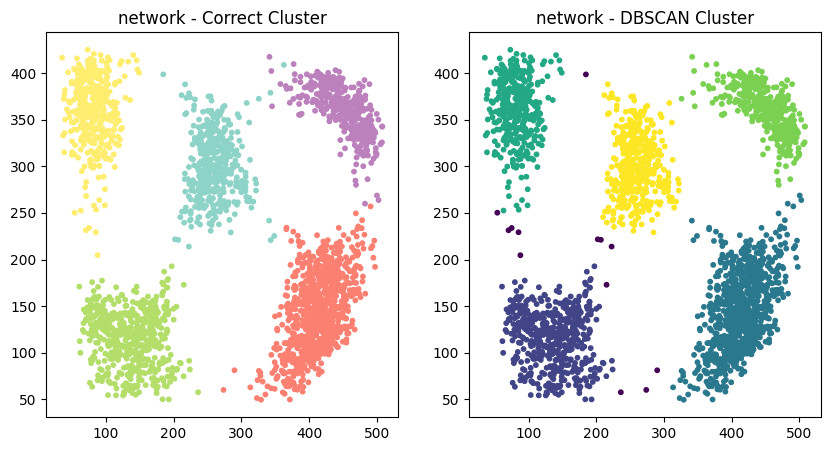

In [ ]:
import matplotlib.pyplot as plt

# Function to plot clusters for a dataset
def plot_clusters(df, dbscan_df, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot Correct Cluster
    ax1.scatter(df['x'], df['y'], c=df['color'], cmap="Set3", s=10)
    ax1.set_title(f"{title} - Correct Cluster")

    # Plot DBSCAN Cluster
    ax2.scatter(dbscan_df['x'], dbscan_df['y'], c=dbscan_df['Cluster'], cmap="viridis", s=10)
    ax2.set_title(f"{title} - DBSCAN Cluster")

    plt.show()

# Plotting clusters for each dataset
plot_clusters(face_df, df_face_df_DBScan, "face")
plot_clusters(chrome_df, df_chrome_df_DBScan, "chrome")
plot_clusters(lines2_df, df_lines2_df_DBScan, "lines2")
plot_clusters(supernova_df, df_supernova_df_DBScan, "supernova")
plot_clusters(network_df, df_network_df_DBScan, "network")
plot_clusters(spirals_df, df_spirals_df_DBScan, "spirals")
plot_clusters(densedisk_df, df_densedisk_df_DBScan, "densedisk")
plot_clusters(rings_df, df_rings_df_DBScan, "rings")

# Special handling for chainlink_df (3D plot)
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax1.set_title("chainlink - Correct Cluster")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df_chainlink_DBScan['x'], df_chainlink_DBScan['y'], df_chainlink_DBScan['z'], c=df_chainlink_DBScan['Cluster'], cmap="viridis", s=10)
ax2.set_title("chainlink - DBSCAN Cluster")

plt.show()


**D. Compare all algorithms**

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.
* Each row should contain each dataset
* Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=4,figsize=(30,30))
fig.suptitle('ANSWER vs different algorithm\n', size = 18)

# Plotting 2D scatter plots for the answer vs K-Means for various datasets
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("Answer Face")
axes[0, 1].scatter(df_face_df_kmeans['x'], df_face_df_kmeans['y'], c=df_face_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("K-Means Face")
axes[0, 2].scatter(df_face_df_AgglomerativeC['x'], df_face_df_AgglomerativeC['y'], c=df_face_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[0, 2].set_title("Hierarchal Face")
axes[0, 3].scatter(df_face_df_DBScan['x'], df_face_df_DBScan['y'], c=df_face_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[0, 3].set_title("DBSCAN Face")


axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("Answer Chrome")
axes[1, 1].scatter(df_chrome_df_kmeans['x'], df_chrome_df_kmeans['y'], c=df_chrome_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("K-Means Chrome")
axes[1, 2].scatter(df_chrome_df_AgglomerativeC['x'], df_chrome_df_AgglomerativeC['y'], c=df_chrome_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[1, 2].set_title("Hierarchal Chrome")
axes[1, 3].scatter(df_chrome_df_DBScan['x'], df_chrome_df_DBScan['y'], c=df_chrome_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[1, 3].set_title("DBSCAN Chrome")

axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("Answer Lines2")
axes[2, 1].scatter(df_lines2_df_kmeans['x'], df_lines2_df_kmeans['y'], c=df_lines2_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("K-Means Lines2")
axes[2, 2].scatter(df_lines2_df_AgglomerativeC['x'], df_lines2_df_AgglomerativeC['y'], c=df_lines2_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[2, 2].set_title("Hierarchal Lines2")
axes[2, 3].scatter(df_lines2_df_DBScan['x'], df_lines2_df_DBScan['y'], c=df_lines2_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[2, 3].set_title("DBSCAN Lines2")


axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("Answer Supernova")
axes[3, 1].scatter(df_supernova_df_kmeans['x'], df_supernova_df_kmeans['y'], c=df_supernova_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("K-Means Supernova")
axes[3, 2].scatter(df_supernova_df_AgglomerativeC['x'], df_supernova_df_AgglomerativeC['y'], c=df_supernova_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[3, 2].set_title("Hierarchal Supernova")
axes[3, 3].scatter(df_supernova_df_DBScan['x'], df_supernova_df_DBScan['y'], c=df_supernova_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[3, 3].set_title("DBSCAN Supernova")


axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("Answer Network")
axes[4, 1].scatter(df_network_df_kmeans['x'], df_network_df_kmeans['y'], c=df_network_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("K-Means Network")
axes[4, 2].scatter(df_network_df_AgglomerativeC['x'], df_network_df_AgglomerativeC['y'], c=df_network_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[4, 2].set_title("Hierarchal Network")
axes[4, 3].scatter(df_network_df_DBScan['x'], df_network_df_DBScan['y'], c=df_network_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[4, 3].set_title("DBSCAN Network")

axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("Answer Spirals")
axes[5, 1].scatter(df_spirals_df_kmeans['x'], df_spirals_df_kmeans['y'], c=df_spirals_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("K-Means Spirals")
axes[5, 2].scatter(df_spirals_df_AgglomerativeC['x'], df_spirals_df_AgglomerativeC['y'], c=df_spirals_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[5, 2].set_title("Hierarchal Spirals")
axes[5, 3].scatter(df_spirals_df_DBScan['x'], df_spirals_df_DBScan['y'], c=df_spirals_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[5, 3].set_title("DBSCAN Spirals")

axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("Answer DenseDisk")
axes[6, 1].scatter(df_densedisk_df_kmeans['x'], df_densedisk_df_kmeans['y'], c=df_densedisk_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("K-Means DenseDisk")
axes[6, 2].scatter(df_densedisk_df_AgglomerativeC['x'], df_densedisk_df_AgglomerativeC['y'], c=df_densedisk_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[6, 2].set_title("Hierarchal DenseDisk")
axes[6, 3].scatter(df_densedisk_df_DBScan['x'], df_densedisk_df_DBScan['y'], c=df_densedisk_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[6, 3].set_title("DBSCAN DenseDisk")


axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("Answer Rings")
axes[7, 1].scatter(df_rings_df_kmeans['x'], df_rings_df_kmeans['y'], c=df_rings_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("K-Means Rings")
axes[7, 2].scatter(df_rings_df_AgglomerativeC['x'], df_rings_df_AgglomerativeC['y'], c=df_rings_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[7, 2].set_title("Hierarchal Rings")
axes[7, 3].scatter(df_rings_df_DBScan['x'], df_rings_df_DBScan['y'], c=df_rings_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[7, 3].set_title("DBSCAN Rings")


# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Create the figure with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Set the title for the whole figure
fig.suptitle('ANSWER vs DBScan\n', size=18)

# Add a 3D plot for chainlink dataset (Answer) in the first subplot
ax3d = fig.add_subplot(221, projection='3d')  # Changed 121 to 221
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D Answer Chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Add a 3D plot for DBScan chainlink dataset in the second subplot
ax3d_dbscan = fig.add_subplot(222, projection='3d')  # Changed 122 to 222
ax3d_dbscan.scatter(df_chainlink_DBScan['x'], df_chainlink_DBScan['y'], df_chainlink_DBScan['z'], c=df_chainlink_DBScan['Cluster'], cmap="Set3", s=10)
ax3d_dbscan.set_title("3D DBScan Chainlink")
ax3d_dbscan.set_xlabel("X")
ax3d_dbscan.set_ylabel("Y")
ax3d_dbscan.set_zlabel("Z")

# Add a 3D plot for K-Means chainlink dataset in the third subplot
ax3d_kmeans = fig.add_subplot(223, projection='3d')  # Changed 123 to 223
ax3d_kmeans.scatter(df_chainlink_kmeans['x'], df_chainlink_kmeans['y'], df_chainlink_kmeans['z'], c=df_chainlink_kmeans['Cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("3D K-Means Chainlink")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

# Add a 3D plot for Agglomerative Chainlink dataset in the fourth subplot
ax3d_agglomerative = fig.add_subplot(224, projection='3d')  # Changed 124 to 224
ax3d_agglomerative.scatter(df_chainlink_AgglomerativeC['x'], df_chainlink_AgglomerativeC['y'], df_chainlink_AgglomerativeC['z'], c=df_chainlink_AgglomerativeC['Cluster'], cmap="Set3", s=10)
ax3d_agglomerative.set_title("3D Hierarchical Chainlink")
ax3d_agglomerative.set_xlabel("X")
ax3d_agglomerative.set_ylabel("Y")
ax3d_agglomerative.set_zlabel("Z")

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()